### imports

In [1]:
### import libraries
import torch
import torch.nn as nn
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\fahee\AppData\Local\Temp\ipykernel_6496\773788732.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
text = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent molestie sapien auctor eleifend egestas. Fusce at purus sodales, viverra nunc quis, consequat augue. Vestibulum eget tempus lorem, et blandit dui. Suspendisse ac gravida odio. Maecenas consequat tristique mi, vitae rutrum lacus pulvinar vitae. Nunc ullamcorper nulla eu velit vehicula, vitae facilisis erat dignissim. Proin consectetur nec lacus ac pellentesque. Nulla purus ligula, commodo id tellus id, efficitur varius massa. Phasellus et volutpat felis, gravida imperdiet justo. Cras metus velit, aliquet et tristique sit amet, elementum ultrices dui. Nullam condimentum quis orci quis pretium. Mauris tincidunt ante nec ex tristique, a commodo quam eleifend. Nam convallis ultrices magna fringilla porta. Phasellus non lobortis nisi. Donec nec lectus ligula. Maecenas id purus at lectus auctor finibus sit amet et enim. Vivamus nibh urna, dapibus sed porta in, sodales vitae elit. Fusce sed facilisis elit, ut porta massa. Vivamus blandit congue erat eget rutrum. Nullam mollis, eros et laoreet euismod, nunc mi condimentum eros, mollis pretium mi orci in nibh. Pellentesque rhoncus justo et pretium tempor. Ut gravida egestas quam, sit amet sagittis tortor scelerisque in. Vestibulum sed odio urna. Donec semper quis erat quis laoreet. Ut malesuada volutpat sem ac luctus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Praesent sed bibendum sapien, id imperdiet elit. Vestibulum erat lorem, finibus eu enim non, posuere tempus velit. Vestibulum a massa id orci interdum malesuada eu vel tellus. Proin tempus viverra scelerisque. Nullam suscipit laoreet nisl, id consequat sem porttitor et. Integer congue urna lacus, ac feugiat arcu tincidunt eget. Aliquam erat volutpat. Vivamus accumsan semper gravida. Mauris porta magna vitae semper hendrerit. Vestibulum urna nunc, faucibus sit amet auctor sed, scelerisque nec est. Nulla ut sagittis urna. Proin fermentum turpis non iaculis tincidunt. Maecenas scelerisque rutrum hendrerit. Sed fermentum vehicula molestie. Sed nec rutrum nisi. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Cras malesuada, magna in ornare pretium, leo tellus sodales tortor, sit amet fermentum nunc odio eu enim. Quisque placerat eros ornare nulla vulputate, at efficitur sem convallis. Sed libero risus, viverra a turpis a, sollicitudin feugiat neque. Fusce vitae erat commodo, consectetur lacus vel, sollicitudin lorem. Nunc sed risus arcu. Pellentesque nec eleifend risus, a fringilla odio. Sed auctor augue a rutrum maximus. Maecenas suscipit tellus sem, vitae suscipit nisl euismod a. Phasellus elementum sodales urna, ac fringilla mi malesuada id. Suspendisse sollicitudin rhoncus dolor ut consequat. Duis tincidunt quis neque nec tincidunt. Fusce vitae sagittis nulla. Suspendisse ac varius mauris. Maecenas dapibus posuere velit, nec pellentesque quam sagittis a. Nunc aliquet justo vitae justo pharetra consectetur. Nam porttitor at nisl sit amet ullamcorper. Sed rutrum, nulla ac porttitor pulvinar, nisi leo hendrerit magna, non luctus nibh risus eget est. Quisque pulvinar rutrum vehicula. Ut tempor placerat sollicitudin. Etiam pharetra sit amet nulla at fringilla. Pellentesque feugiat odio ligula, ac ullamcorper leo vulputate a. Vestibulum placerat interdum arcu, sit amet ullamcorper ipsum finibus sed. Aliquam erat volutpat. Nam tincidunt, augue eu eleifend dictum, tellus sem blandit sem, et pulvinar ex purus sed leo. Nullam ultricies tincidunt sem, imperdiet condimentum ex porttitor at. Nunc id lacus sit amet nibh elementum dignissim. Nam facilisis tincidunt tincidunt. Suspendisse in mauris vel dui imperdiet facilisis. Aenean eu neque tortor. Cras sit amet mi nibh. Mauris sit amet feugiat nulla. Nam ac leo ipsum. Vestibulum id enim sit amet est pharetra consectetur. Vestibulum et lacus sed ipsum placerat blandit vitae quis nisl. Curabitur lacus est, euismod non accumsan sed, accumsan nec lectus. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ultrices eros in erat molestie interdum. Nunc et tellus orci. Maecenas et magna ornare mauris sodales malesuada. Duis iaculis ipsum non laoreet porta. Aenean vitae purus tempor, porttitor arcu id, bibendum enim. Aliquam faucibus congue eros, eget feugiat risus venenatis a. Duis malesuada, sem eu mattis placerat, velit lectus varius tellus, eget placerat nibh quam non turpis. Donec auctor pellentesque odio, nec pulvinar nisi fermentum eget. Mauris eget eleifend metus. Mauris venenatis arcu semper erat facilisis, malesuada viverra tortor imperdiet. Nunc ut quam sit amet ex varius euismod. Mauris eleifend lectus venenatis risus mattis consequat. Nulla a eros non erat egestas consequat nec volutpat neque. In diam nulla, mollis ut semper nec, vulputate luctus odio. Morbi ac elementum quam, ut vestibulum sem. Ut tincidunt sapien ac fermentum ullamcorper. Cras convallis tortor quis malesuada dignissim. Suspendisse rutrum cursus diam, in consequat nisi vulputate sit amet. Nunc euismod consectetur libero eu pulvinar. Ut finibus scelerisque lectus vel auctor. Vivamus congue non sem et tincidunt. Vestibulum vehicula erat sed nisi mattis aliquet. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam pulvinar tortor enim, vel blandit mauris sodales quis. Ut bibendum dui non posuere pellentesque. Phasellus metus diam, blandit accumsan porta a, pharetra nec nulla. Nam pulvinar, lacus et ornare luctus, magna orci tincidunt lorem, porttitor tincidunt enim mi a ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam quis mi porta, mattis velit vel, rhoncus nisi. Etiam lobortis placerat lacus.'.lower()
# generated at https://www.lipsum.com/

print(text)

lorem ipsum dolor sit amet, consectetur adipiscing elit. praesent molestie sapien auctor eleifend egestas. fusce at purus sodales, viverra nunc quis, consequat augue. vestibulum eget tempus lorem, et blandit dui. suspendisse ac gravida odio. maecenas consequat tristique mi, vitae rutrum lacus pulvinar vitae. nunc ullamcorper nulla eu velit vehicula, vitae facilisis erat dignissim. proin consectetur nec lacus ac pellentesque. nulla purus ligula, commodo id tellus id, efficitur varius massa. phasellus et volutpat felis, gravida imperdiet justo. cras metus velit, aliquet et tristique sit amet, elementum ultrices dui. nullam condimentum quis orci quis pretium. mauris tincidunt ante nec ex tristique, a commodo quam eleifend. nam convallis ultrices magna fringilla porta. phasellus non lobortis nisi. donec nec lectus ligula. maecenas id purus at lectus auctor finibus sit amet et enim. vivamus nibh urna, dapibus sed porta in, sodales vitae elit. fusce sed facilisis elit, ut porta massa. vivamu

### preprocess data

In [4]:
# get all the unique characters
uniquecharacters = set(text)

# look-up tables to convert characters to indices and vice-versa

number2letter = dict(enumerate(uniquecharacters))

letter2number = {l: i for i, l in number2letter.items()}

tensor([[ 0],
        [11],
        [ 3],
        ...,
        [ 7],
        [21],
        [25]])


Text(0, 0.5, 'Character label')

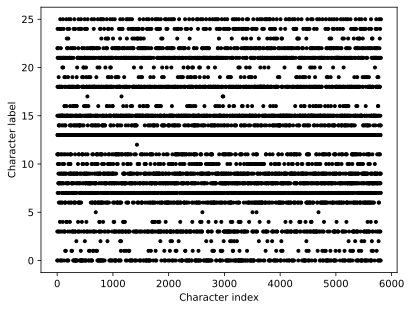

In [5]:
# convert the text from characters into numbers

# note the inputs to zeros()
data = torch.zeros((len(text), 1), dtype=torch.int64, device=device)
for i, ch in enumerate(text):
    data[i] = letter2number[ch]


# let's see the data!
print(data)
plt.plot(data.cpu().numpy(), "k.")
plt.xlabel("Character index")
plt.ylabel("Character label")

### RNN model

In [6]:
class lstmnet(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super().__init__()

        # embedding layer
        self.embedding = nn.Embedding(input_size, input_size)

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)

        # linear output layer
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x, h):

        # embedding layer
        embedding = self.embedding(x)

        # run through the RNN layer
        y, h = self.lstm(embedding, h)

        # and the output (linear) layer
        y = self.out(y)

        return y, (h[0].detach(), h[1].detach())  # just the numerical values for h

In [7]:
# meta-parameters
hidden_size = 512  # size of hidden state
seqlength = 80  # length of sequence
num_layers = 3  # number of stacked hidden layers
epochs = 10  # training epochs

In [8]:
# model instance
lstm = lstmnet(len(uniquecharacters),len(uniquecharacters), hidden_size, num_layers).to(device)

# loss function and optimizer
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=.001)

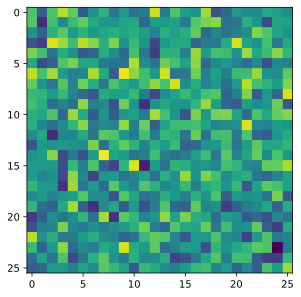

In [9]:
# visualize the randomly initialized embeddings matrix
I = next(lstm.embedding.named_parameters())
plt.imshow(I[1].cpu().detach())

### train model

In [ ]:
losses = np.zeros(epochs)

# loop over epochs
for epochi in range(epochs):

    # initialize loss for this epoch, and hidden state
    txtloss = 0
    hidden_state = None

    # loop through the entire text character-wise
    for txtloc in range(0, len(text) - seqlength):

        # get input and target (shifted version of input)
        x = data[txtloc : txtloc + seqlength]
        y = data[txtloc + 1 : txtloc + seqlength + 1]

        # forward pass
        output, hidden_state = lstm(x, None)

        # compute loss
        loss = lossfun(torch.squeeze(output), torch.squeeze(y))
        txtloss += loss.item()

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # average losses for this epoch (run through the entire text)
    losses[epochi] = txtloss / txtloc

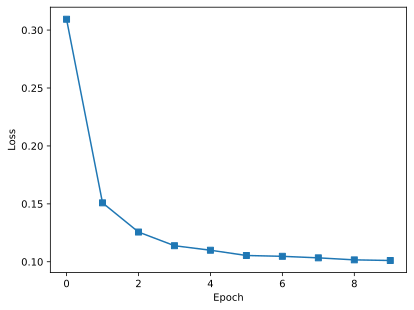

In [ ]:
# check out the losses
plt.plot(losses, "s-")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### generate lorem ipsum

In [14]:
# how many characters to generate?
lorem_length = 200

# random character from data to begin
x = torch.tensor(letter2number["x"]).view(1, 1).to(device)
lorem = number2letter[x.item()]

# initialize the hidden state
hidden_state = None


# generate the text!
for i in range(lorem_length):

    # push a letter though the LSTM
    output, hidden_state = lstm(x, hidden_state)

    # get the maximum output and replace input data
    index = torch.argmax(output).item()
    x[0][0] = index

    # append that output to the text
    lorem += number2letter[index]


## what's it say?!?!?!
lorem

'x porta tristique senectus et netus et malesuada fames ac turpis egestas. etiam quis mi porta, mattis velit vel, rhoncus nisi. etiam lobortis placerat lacus et ornare luctus, magna orci tincidunt enim '

### analyze the hidden states

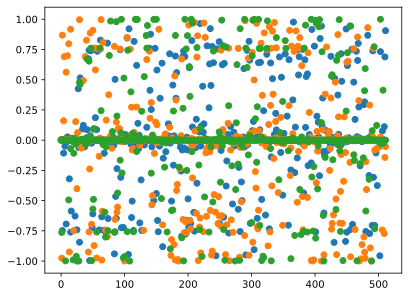

In [15]:
# plot hidden states
for i in range(num_layers):
    plt.plot(hidden_state[0][i, 0, :].cpu().numpy(), "o")

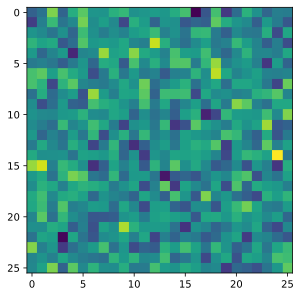

In [16]:
# visualize the learned embeddings matrix
I = next(lstm.embedding.named_parameters())
I = I[1].cpu().detach().numpy()
plt.imshow(I)

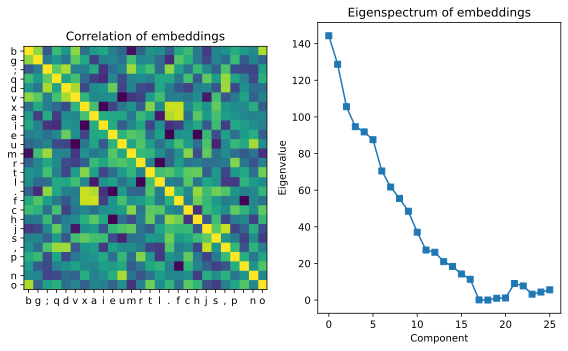

In [17]:
# FYI, lots can be done with this matrix, e.g., PCA...
d, V = np.linalg.eig(I @ I.T)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].imshow(np.corrcoef(I), vmin=-0.5, vmax=0.5)
axs[0].set_title("Correlation of embeddings")
axs[0].set_xticks(range(len(letter2number.keys())))
axs[0].set_xticklabels(letter2number.keys())
axs[0].set_yticks(range(len(letter2number.keys())))
axs[0].set_yticklabels(letter2number.keys())

axs[1].plot(d, "s-")
axs[1].set_xlabel("Component")
axs[1].set_ylabel("Eigenvalue")
axs[1].set_title("Eigenspectrum of embeddings")

plt.tight_layout()
plt.show()